In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos los datos a utilizar para las visualizaciones

In [12]:
data_arch1 = [
    ['max', 0.7415, 0.7421, 0.7396, 0.7423, 0.742],
    ['avg', 0.7487, 0.758, 0.7562, 0.7452, 0.7562],
    ['g_prod', 0.7554, 0.7577, 0.747, 0.7535, 0.7515],
    ['g_max', 0.7428, 0.7445, 0.7434, 0.7397, 0.741],
    ['g_min', 0.7444, 0.7431, 0.7405, 0.7406, 0.7429],
    ['g_ob', 0.7559, 0.7583, 0.7497, 0.7582, 0.7552],
    ['g_geom', 0.7486, 0.7563, 0.758, 0.7544, 0.7535],
    ['g_u', 0.7407, 0.7451, 0.7416, 0.7491, 0.7439],
    ['gp_max', 0.736, 0.7357, 0.7414, 0.7303, 0.7387],
    ['gp_prod', 0.7557, 0.7548, 0.7588, 0.7573, 0.7506],
    ['gp_geom', 0.7534, 0.7466, 0.1, 0.6547, 0.7502],
]

# data_arch2 = [
#     ['max', 0.8658, 0.8682, 0.8606, 0.8632, 0.8578],
#     ['avg', 0.8584, 0.8661, 0.8602, 0.8633, 0.8643],
#     ['g_prod', 0.8750, 0.8714, 0.8735, 0.8738, 0.8711],
#     ['g_max', 0.8639, 0.8669, 0.8651, 0.8639, 0.8588],
#     ['g_min', 0.8658, 0.8620, 0.8618, 0.8665, 0.8657],
#     ['g_ob', 0.8735, 0.8798, 0.8739, 0.8736, 0.8697],
#     ['g_geom', 0.7911, 0.7887, 0.7918, 0.7834, 0.7818],
#     ['g_u', 0.8049, 0.8049, 0.8093, 0.8079, 0.8213],
#     ['gp_max', 0.8701, 0.8722, 0.8680, 0.8674, 0.8681],
#     ['gp_prod', 0.8442, 0.8250, 0.8388, 0.8404, 0.8297],
#     ['gp_geom', 0.8340, 0.8332, 0.8328, 0.8391, 0.8392],
# ]

df = pd.DataFrame(data=data_arch1, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')

print(df)
print(df.T)
prueba = df.T

          Test1   Test2   Test3   Test4   Test5
Model                                          
max      0.7415  0.7421  0.7396  0.7423  0.7420
avg      0.7487  0.7580  0.7562  0.7452  0.7562
g_prod   0.7554  0.7577  0.7470  0.7535  0.7515
g_max    0.7428  0.7445  0.7434  0.7397  0.7410
g_min    0.7444  0.7431  0.7405  0.7406  0.7429
g_ob     0.7559  0.7583  0.7497  0.7582  0.7552
g_geom   0.7486  0.7563  0.7580  0.7544  0.7535
g_u      0.7407  0.7451  0.7416  0.7491  0.7439
gp_max   0.7360  0.7357  0.7414  0.7303  0.7387
gp_prod  0.7557  0.7548  0.7588  0.7573  0.7506
gp_geom  0.7534  0.7466  0.1000  0.6547  0.7502
Model     max     avg  g_prod   g_max   g_min    g_ob  g_geom     g_u  gp_max  \
Test1  0.7415  0.7487  0.7554  0.7428  0.7444  0.7559  0.7486  0.7407  0.7360   
Test2  0.7421  0.7580  0.7577  0.7445  0.7431  0.7583  0.7563  0.7451  0.7357   
Test3  0.7396  0.7562  0.7470  0.7434  0.7405  0.7497  0.7580  0.7416  0.7414   
Test4  0.7423  0.7452  0.7535  0.7397  0.7406  0.758

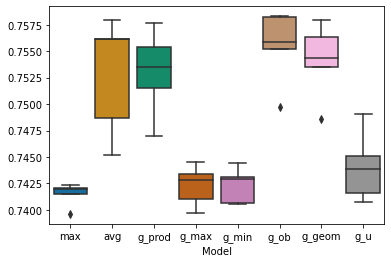

In [13]:
fig = plt.figure()
ax = sns.boxplot(data=df.head(8).T, palette='colorblind')

Guardamos los plots generados en la carpeta reports/plots

In [57]:
import os
PATH_REPORTS = os.path.join('..', '..', 'reports')

PATH_plots = os.path.join(PATH_REPORTS, 'plots')
try:
    os.mkdir(PATH_plots)
except FileExistsError as e:
    pass

fig.savefig(os.path.join(PATH_plots, 'groupings_arch1_boxplot.pdf'))

# Comparación entre gráficas de entrenamiento

Nota: Vamos a cargar los datos a partir del formato exportado por TensorBoard

In [90]:
import os
PATH_REPORTS = os.path.join('..', '..', 'reports')
PATH_plots = os.path.join(PATH_REPORTS, 'plots')
PATH_log_data = os.path.join(PATH_REPORTS, 'log_data')

Cargamos los datos exportados por tensorboard en formato csv

In [91]:
test_log_folder = os.path.join(PATH_log_data, 'best_methods')
data_names = []
data = []
for log_file in os.listdir(test_log_folder):
    data_names.append(log_file)
    data.append(pd.read_csv(os.path.join(test_log_folder, log_file)))

In [92]:
print(data_names)
print(data[0]['Value'].values)

data_names = ['max', 'g_ob', 'g_prod']


['run-nin_pool_max_100epochs_test_0-tag-acc_val.csv', 'run-nin_pool_grouping_ob_100epochs_test_0-tag-acc_val.csv', 'run-nin_pool_grouping_product_100epochs_test_0-tag-acc_val.csv']
[0.2563     0.35550001 0.47729999 0.49559999 0.56650001 0.58420002
 0.59710002 0.63510001 0.65630001 0.68769997 0.67720002 0.7238
 0.73379999 0.73930001 0.73940003 0.7493     0.7651     0.76069999
 0.77569997 0.77999997 0.80049998 0.78030002 0.7676     0.80659997
 0.8075     0.80860001 0.80800003 0.81389999 0.79149997 0.82529998
 0.81940001 0.81819999 0.8211     0.82279998 0.82609999 0.82980001
 0.8283     0.83310002 0.82230002 0.83579999 0.82740003 0.82849997
 0.82679999 0.81889999 0.83999997 0.84149998 0.82980001 0.82959998
 0.83950001 0.83209997 0.84179997 0.84259999 0.84930003 0.85589999
 0.85680002 0.85420001 0.85659999 0.85530001 0.85030001 0.84729999
 0.84990001 0.85350001 0.85470003 0.85829997 0.86080003 0.85589999
 0.85280001 0.85570002 0.85750002 0.861      0.86210001 0.85900003
 0.8617     0.85909

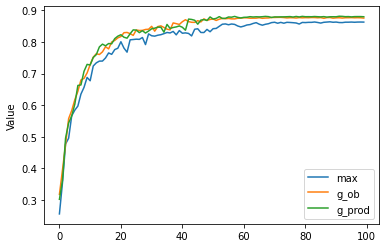

In [94]:
fig = plt.figure()
for data_model in data:
    sns.lineplot(data=data_model['Value'])
plt.legend(labels=data_names)
plt.savefig(os.path.join(PATH_plots, 'training.pdf'))

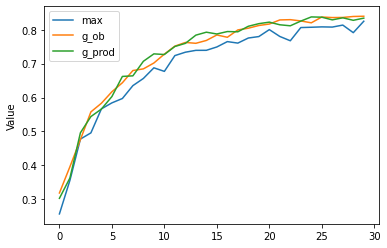

In [95]:
fig = plt.figure()
for data_model in data:
    sns.lineplot(data=data_model['Value'][:30])
plt.legend(labels=data_names)
plt.savefig(os.path.join(PATH_plots, 'training30epochs.pdf'))

In [80]:
soft_data = []
for data_model in data:
    copy_data = data_model
    copy_data['Value'] = copy_data['Value'].ewm(alpha=0.6).mean()
    soft_data.append(copy_data)
print(soft_data)

[       Wall time  Step     Value
0   1.633351e+09     0  0.256300
1   1.633351e+09     1  0.327157
2   1.633351e+09     2  0.423403
3   1.633351e+09     3  0.467859
4   1.633351e+09     4  0.527656
..           ...   ...       ...
95  1.633353e+09    95  0.862476
96  1.633353e+09    96  0.862250
97  1.633353e+09    97  0.862520
98  1.633353e+09    98  0.862688
99  1.633353e+09    99  0.862635

[100 rows x 3 columns],        Wall time  Step     Value
0   1.633178e+09     0  0.318100
1   1.633178e+09     1  0.373457
2   1.633178e+09     2  0.439062
3   1.633178e+09     3  0.512053
4   1.633178e+09     4  0.555122
..           ...   ...       ...
95  1.633182e+09    95  0.876523
96  1.633182e+09    96  0.876329
97  1.633182e+09    97  0.876432
98  1.633182e+09    98  0.876293
99  1.633182e+09    99  0.875637

[100 rows x 3 columns],        Wall time  Step     Value
0   1.633152e+09     0  0.302400
1   1.633152e+09     1  0.345186
2   1.633152e+09     2  0.441797
3   1.633152e+09     3  0

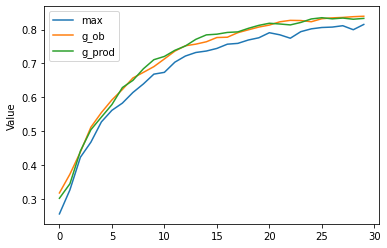

In [85]:
fig = plt.figure()
for data_model in soft_data:
    sns.lineplot(data=data_model['Value'][:30])
plt.legend(labels=data_names)
plt.savefig(os.path.join(PATH_plots, 'training30epochs_soft.pdf'))